Let's implement the Thimbleby algorithm.

First, we need a depth map.

In [158]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
max_x = 300

In [176]:
depth_map = (np.cos((np.arange(max_x) - max_x/2) / max_x/2. * 2 * np.pi) + 1)/2

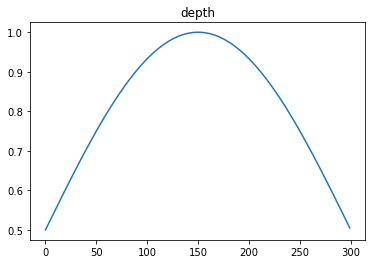

In [177]:
plt.plot(depth_map)
plt.title('depth')

Now we do the first pass: init the constraint vector.

In [178]:
constraint = np.arange(depth_map.size)

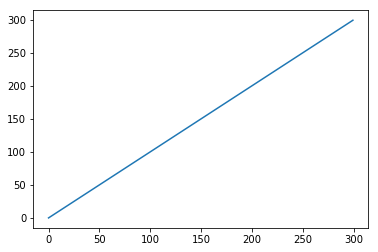

In [179]:
plt.plot(constraint)

Now we do the constraint loop.

In [180]:
def compute_separation(depth, E, mu=1/3):
    "Depth should be in 0-1 range."
    return (1 - mu * depth) / (2 - mu * depth) * E

In [181]:
E = 400

In [182]:
def compute_constraint(depth_map):
    constraint = np.arange(depth_map.size)
    for x in np.arange(depth_map.size):
        s = compute_separation(depth_map[x], E=E)
        left = int(x - s / 2)
        right = int(x + s/2)
        left_valid = left >= 0 and left < depth_map.size
        right_valid = right >= 0 and right < depth_map.size
        if left_valid and right_valid:
            constraint[left] = right
    return constraint

In [183]:
constraint = compute_constraint(depth_map)

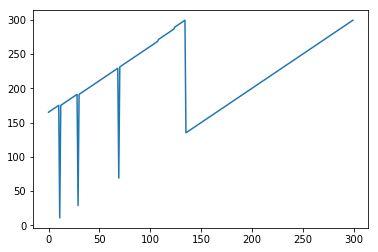

In [184]:
plt.plot(constraint)

In [185]:
np.unique(constraint).size / constraint.size

0.56

We can look at it interactively.

In [186]:
from ipywidgets import interact

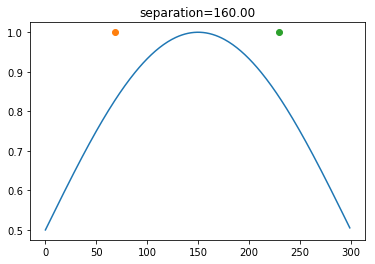

In [187]:
@interact
def plot_constraints(idx=(0, depth_map.size - 1)):
    "Plots the decision process."
    s = compute_separation(depth_map[idx], E=E)
    left = int(idx - s/2)
    right = int(idx + s/2)
    plt.plot(depth_map)
    plt.plot(left, 1, 'o')
    plt.plot(right, 1, 'o')
    plt.title('separation={:.2f}'.format(s))

The second loop is in decreasing order, from right to left.

In [188]:
def fill_pixels(constraint):
    "Fills pixels from constraint mappping."
    pixels = np.empty_like(constraint)
    for x in np.arange(constraint.size)[::-1]:
        if constraint[x] == x:
            pixels[x] = np.random.randint(2)
        else:
            pixels[x] = pixels[constraint[x]]
    return pixels

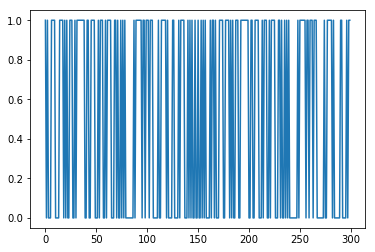

In [189]:
pixels = fill_pixels(constraint)

plt.plot(pixels)

Now all, we need to do is repeat that a hundred lines.

In [192]:
autostereogram = np.r_[[fill_pixels(constraint) for _ in range(250)]]

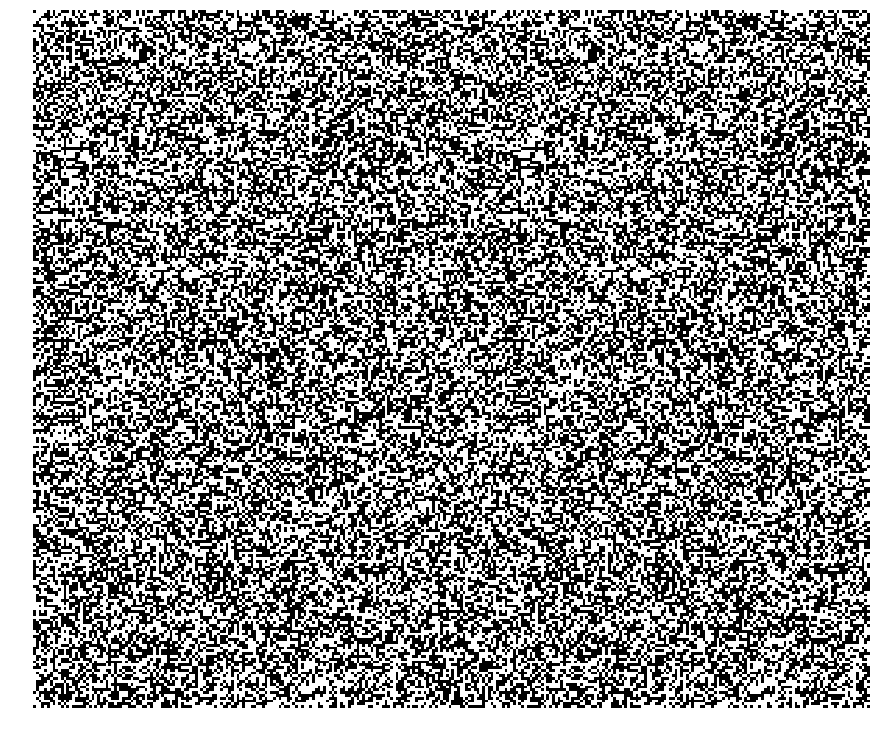

In [193]:
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(autostereogram, cmap='gray')